# 회귀분석(regression)

- 여러개의 독립변수와 한 개의 종속변수 간의 상관관계를 모델링하는 기법
- 최적의 weight, bias를 결정 (regression coefficient -> 회귀 계수 찾기)
- RSS(residual) = 비용함수(cost function) =  (1/n)*Σ(yᵢ - ŷᵢ)² 
- 회귀분석에서 '학습'이란 비용함수를 최소화할 수 있는 w와 b를 찾아가는 과정이다
    - 최소제곱법
    - 경사하강법 , 확률적 경사하강법 ...

> Gradient Descent 이론


#### 기울기(Gradient) 
- 기울기(Gradient)란 미분 가능한 N개의 다변수 함수를 각 축이 가리키는 방향마다 편미분한 것
- Gradient를 수식으로 나타내면 아래와 같으며, Del 또는 Nabla 연산자를 사용하여 표현하기도 한다
    
![Alt text](image.png)
- 조금 쉽게 2차원으로 줄여 f(x,y)로 줄여본다면

![Alt text](image-2.png)
- 이처럼 Gradient는 스칼라 함수를 입력으로 받아 벡터장(Vector Field)을 생성하는 역할을 한다
- 즉 gradient(f)는 x,y의 함수이자 x,y축에 대응되는 벡터를 생성할 수 있다


#### 경사 하강법(gradient descent)
- 점진적으로 반복적인 계산을 통해 w파라미터 값을 덥데이트하면서, 오류 값이 최소가 되는 w파라미터를 구하는 방식
- RSS를 최소화하는 방법
- 미분된 1차 함수의 기울기가 감소하지 않는 지점을 비용함수가 최소인 지점으로 간주한다 ---> 그때의 w를 반환한다
- 대입 방법 : smarter steps, cheaper steps, too small steps, too large steps

![Alt text](image-3.png)

1. 예를 들어, wₙ₋₁을 임의의 가중치로 선정했다고 가정.
2. 최적의 가중치를 찾기 위해서 목표 함수인 손실 함수를 비용 함수 w에 대해 편미분하고, 이를 학습률(Learning rate)과 곱한 값을 앞서 선정한 wₙ₋₁에서 뺀다
3. 위 수식을 통해 손실 함수의 값이 거의 변하지 않을 때까지 가중치를 업데이트하는 과정을 반복

![Alt text](image-4.png)
![Alt text](image-5.png)

#### 용어
- 학습률(learning rate): 학습률을 설정해서 새로운 회귀계수를 구한다
    - 학습률이 작을수록 촘촘하게 파라미터를 변화시켜 모델학습 시간이 오래걸린다
    - 학습률이 너무 크면 손실 함수 자체를 벗어나 학습이 되지 않을 수 있다
- 에포크수(epoch): 학습 횟수
    - early stopping
- 학습률 결정에는 배치하강법, 확률적 경사 하강법등등이 있고 이를 구하는 방법을 optimizer이라고 한다
- 배치 사이즈 : 단일 반복에서 기울기를 계산하는 데 사용하는 data의 개수
    - 경사하강법에서의 배치는 전체 데이터 셋으로 가정

---

### 확률적 경사하강법

- 경사 하강법은 비효율적이며, 파라미터 업데이트 수가 적다는 것은 랜덤 하게 뽑힌 시작 위치의 가중치 수도 적으므로, Local minimum 현상이 발생할 확률도 높다
- 그래서 나온 방법이 학습 데이터셋에서 무작위로 한 개의 샘플 데이터 셋을 추출하고, 그 샘플에 대해서만 기울기를 계산하는 것이다
- 하나의 샘플만 대상으로 경사를 계산하므로, 메모리 소모량이 매우 낮으며, 매우 큰 훈련 데이터 셋이라 할지라도 학습 가능하다.
- 그러나, 무작위로 추출된 샘플에 대해서 경사를 구하므로, 배치 경사 하강법보다 훨씬 불안정하게 움직인다.

![Alt text](image-6.png)

- 즉, 확률적 경사 하강법(SGD)은 속도가 매우 빠르고 메모리를 적게 먹는다는 장점이 있으나, 경사를 구할 때, 무작위성을 띄므로 지역 최솟값에서 탈출하기 쉬우나, 전역 최솟값에 다다르기 힘들다는 단점을 가지고 있다.
- 이 문제를 해결하기 미니 배치 경사 하강법(mini-Batch gradient descent)이 등장하였다.

### 확률적 미니배치 경사 하강법

-  미니 배치 경사 하강법은 배치 크기를 줄이고, 확률적 경사 하강법을 사용하는 기법이다.
- 예를 들어, 학습 데이터가 1000개고, batch size를 100으로 잡았다고 할 때, 총 10개의 mini batch가 나오게 된다. 이 mini batch 하나당 한 번씩 SGD를 진행하므로, 1 epoch당 총 10번의 SGD를 진행한다고 할 수 있다.
- 일반적으로 우리가 부르는 확률적 경사 하강법(SGD)은 실제론 미니 배치 경사 하강법(mini-BGD)이므로, 지금까지 학습했던 차이들은 기억하되, 앞으로 SGD를 말하면, 미니 배치 경사 하강법을 떠올리면 된다.
- 배치크기는 총 학습 데이터의 크기를 배치 사이즈로 나눴을 때 나오는 값으로 하자
    - 총학습 데이터의 개수 = 배치 크기  * 배치 사이즈

![Alt text](image-7.png)

---

> 실제 hard coding으로 경사 하강법 구현

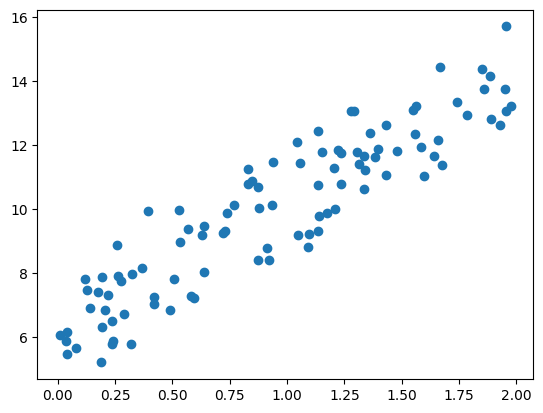

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

np.random.seed(0)
X= 2*np.random.rand(100,1)
y= 6+4*X +np.random.randn(100,1)

plt.scatter(X,y)

In [2]:
def get_weight_updates(w1,w0,X,y,learning_rate=0.01):
    N = len(y)
    w1_update=np.zeros_like(w1)
    w0_update=np.zeros_like(w0)

    y_pred= np.dot(X,w1.T)+w0
    diff=y-y_pred

    w0_factors= np.ones((N,1))

    w1_update = -(2/N)*learning_rate*(np.dot(X.T,diff))
    w0_update= -(2/N)*learning_rate*(np.dot(w0_factors.T,diff))

    return w1_update, w0_update

In [3]:
def gradient_descent_steps(X,y,iters=10000):
    w0=np.zeros((1,1))
    w1=np.zeros((1,1))

    for ind in range(iters):
        w1_update, w0_update = get_weight_updates(w1,w0,X,y,learning_rate=0.01)
        w1=w1-w1_update
        w0=w0-w0_update

    return w1,w0

In [4]:
def get_cost(y,y_pred):
    N=len(y)
    cost= np.sum(np.square(y-y_pred))/N
    return cost


In [5]:
for i in range(1000):
    w1,w0= gradient_descent_steps(X,y,iters=i)
    print(f"w1:{w1[0,0]:.3f}, w0:{w0[0,0]:.3f}")
    y_pred=w1[0,0]*X +w0
    print(f"Gradient Descent Total Cost:{get_cost(y,y_pred):.4f}")

w1:0.000, w0:0.000
Gradient Descent Total Cost:105.7228
w1:0.215, w0:0.199
Gradient Descent Total Cost:97.2970
w1:0.421, w0:0.391
Gradient Descent Total Cost:89.5527
w1:0.618, w0:0.575
Gradient Descent Total Cost:82.4348
w1:0.807, w0:0.751
Gradient Descent Total Cost:75.8925
w1:0.988, w0:0.920
Gradient Descent Total Cost:69.8793
w1:1.162, w0:1.083
Gradient Descent Total Cost:64.3524
w1:1.328, w0:1.238
Gradient Descent Total Cost:59.2724
w1:1.487, w0:1.388
Gradient Descent Total Cost:54.6032
w1:1.639, w0:1.532
Gradient Descent Total Cost:50.3115
w1:1.785, w0:1.670
Gradient Descent Total Cost:46.3668
w1:1.925, w0:1.802
Gradient Descent Total Cost:42.7410
w1:2.058, w0:1.929
Gradient Descent Total Cost:39.4083
w1:2.186, w0:2.051
Gradient Descent Total Cost:36.3450
w1:2.309, w0:2.168
Gradient Descent Total Cost:33.5293
w1:2.426, w0:2.281
Gradient Descent Total Cost:30.9412
w1:2.539, w0:2.389
Gradient Descent Total Cost:28.5621
w1:2.646, w0:2.492
Gradient Descent Total Cost:26.3753
w1:2.749,

> 확률적 경사 하강법

In [6]:
def stochastic_gradient_descent_steps(X,y,batch_size=10,iters=1000):
    w0 = np.zeros((1,1))
    w1 = np.zeros((1,1))
    prev_cost= 100000
    iter_index=0

    for ind in range(iters):
        stochastic_random_index= np.random.permutation(X.shape[0])
        sample_X = X[stochastic_random_index[0:batch_size]]
        sample_y = y[stochastic_random_index[0:batch_size]]

        w1_update,w0_update = get_weight_updates(w1,w0,sample_X,sample_y,learning_rate=0.01)
        w1=w1-w1_update
        w0=w0-w0_update

    return w1,w0

In [7]:
np.random.permutation(X.shape[0])

array([66, 71, 54, 88, 82, 12, 36, 46, 14, 67, 10,  3, 62, 29, 97, 69, 70,
       93, 31, 73, 60, 96, 28, 27, 21, 19, 33, 78, 32, 94,  1, 41, 40, 76,
       37, 87, 24, 23, 50,  2, 47, 20, 77, 17, 56, 64, 68, 25, 15, 22, 16,
       98, 63, 92, 86, 38,  6, 57, 95, 44,  9, 42, 81, 99, 35, 84, 59, 48,
       75, 65, 85, 90, 55, 43, 58, 89, 30, 80, 34, 18, 51, 49, 52, 74, 26,
       45, 39,  4, 11, 53, 91, 79,  8,  0,  5, 13, 61, 72,  7, 83])

In [8]:
for i in range(1000):
    w1,w0 =stochastic_gradient_descent_steps(X,y,iters=i)
    print("w1:",round(w0[0,0],3), "w0:",round(w0[0,0],3))
    y_pred = w1[0,0]*X +w0
    print(f'Stochastic Gradient Descent Total Cost:{get_cost(y,y_pred):.4f}')

w1: 0.0 w0: 0.0
Stochastic Gradient Descent Total Cost:105.7228
w1: 0.17 w0: 0.17
Stochastic Gradient Descent Total Cost:99.8669
w1: 0.385 w0: 0.385
Stochastic Gradient Descent Total Cost:89.7911
w1: 0.551 w0: 0.551
Stochastic Gradient Descent Total Cost:84.7657
w1: 0.771 w0: 0.771
Stochastic Gradient Descent Total Cost:75.4251
w1: 0.935 w0: 0.935
Stochastic Gradient Descent Total Cost:68.8779
w1: 1.066 w0: 1.066
Stochastic Gradient Descent Total Cost:65.6429
w1: 1.237 w0: 1.237
Stochastic Gradient Descent Total Cost:59.0729
w1: 1.405 w0: 1.405
Stochastic Gradient Descent Total Cost:53.8537
w1: 1.498 w0: 1.498
Stochastic Gradient Descent Total Cost:51.4437
w1: 1.692 w0: 1.692
Stochastic Gradient Descent Total Cost:43.9308
w1: 1.78 w0: 1.78
Stochastic Gradient Descent Total Cost:44.6218
w1: 1.951 w0: 1.951
Stochastic Gradient Descent Total Cost:38.0886
w1: 2.053 w0: 2.053
Stochastic Gradient Descent Total Cost:36.7494
w1: 2.181 w0: 2.181
Stochastic Gradient Descent Total Cost:31.7727
w1